# Criptografía y seguridad de la información

Grupo 4

Integrantes:
*   Jhonny Ninabanda
*   Joan Santamaria
*   Kevin Celi
*   Michael Barrionuevo
*   Dylan Lema













# Permutación o transposición (Difusión)

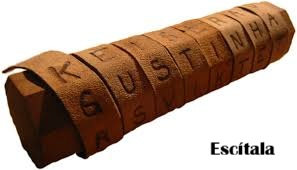

# Transposición Columnar

# Código

In [1]:
# Convierte la clave de texto en una clave numérica según el orden alfabético
def clave_a_numerica(clave):
    # Convierte la clave en lista y la ordena alfabéticamente
    orden = sorted(list(clave))
    # Asigna un número a cada letra según su posición en el orden alfabético
    return [orden.index(c) for c in clave]


# Crea una matriz colocando el texto en filas según la cantidad de columnas
# Esto organiza el mensaje para luego leerlo por columnas
def crear_matriz(texto, columnas):
    # Calcula cuántas filas se necesitan
    filas = (len(texto) + columnas - 1) // columnas
    # Completa con espacios si el texto no encaja perfecto en la matriz
    texto = texto.ljust(filas * columnas)
    # Divide el texto en listas de caracteres del tamaño de columnas
    return [list(texto[i:i+columnas]) for i in range(0, len(texto), columnas)]


# Muestra la matriz de forma visual en la consola para facilitar el análisis
def imprimir_matriz(matriz, titulo):
    print("\n" + titulo)  # Imprime el título sobre la matriz
    for fila in matriz:  # Recorre cada fila
        print(" | ".join(fila))  # Muestra sus caracteres separados por barras
    print()  # Espacio estético debajo


# Cifra el mensaje reordenando sus columnas según la clave
# Este es el corazón del método: la difusión ocurre al reacomodar posiciones
def cifrar(texto, clave):
    clave_num = clave_a_numerica(clave)  # Obtiene clave numérica
    matriz = crear_matriz(texto, len(clave))  # Organiza texto en matriz
    imprimir_matriz(matriz, "Matriz original:")  # Visualizamos la matriz inicial

    cifrado = ""  # Aquí se construirá el mensaje cifrado
    print("Orden de columnas:", clave_num)  # Muestra el orden de lectura de columnas

    # Se recorren columnas en el orden indicado por la clave
    for idx in sorted(range(len(clave)), key=lambda i: clave_num[i]):
        for fila in matriz:  # Recorrer cada fila de arriba hacia abajo
            cifrado += fila[idx]  # Tomamos la letra en esa columna

    return cifrado  # Se devuelve el texto cifrado


# Reconstruye la matriz a partir del texto cifrado para recuperar el original
# Invierte el proceso de la función cifrar
def descifrar(texto_cifrado, clave):
    clave_num = clave_a_numerica(clave)  # Recalcula clave numérica
    columnas = len(clave)  # Número de columnas igual que la clave
    # Determina cuántas filas debe tener la matriz reconstruida
    filas = (len(texto_cifrado) + columnas - 1) // columnas

    # --- Mostrar orden de columnas ---
    print("Orden de columnas:", clave_num)
    # Clave ordenada según su número (ascendente)
    clave_ordenada = [letra for _, letra in sorted(zip(clave_num, clave))]
    print("Clave ordenada según clave_num:", clave_ordenada)


    # --- Visualización didáctica: matriz llena por columnas directamente ---
    matriz_columna = [[""] * columnas for _ in range(filas)]
    pos = 0
    for col in range(columnas):
        for fila in range(filas):
            if pos < len(texto_cifrado):
                matriz_columna[fila][col] = texto_cifrado[pos]
                pos += 1
    imprimir_matriz(matriz_columna, "Matriz con mensaje cifrado colocada por columnas:")

    # Inicializa una matriz vacía
    matriz = [[""] * columnas for _ in range(filas)]

    pos = 0  # Posición dentro del texto cifrado
    # Se llenan columnas según el orden que marcó el cifrado
    for idx in sorted(range(columnas), key=lambda i: clave_num[i]):
        for f in range(filas):
            matriz[f][idx] = texto_cifrado[pos]  # Se coloca la letra en su lugar original
            pos += 1  # Avanza a la siguiente letra

    imprimir_matriz(matriz, "Matriz reconstruida:")  # Visualizamos para verificar

    # Se unen todas las letras en orden fila-por-fila y se quitan espacios sobrantes
    return "".join("".join(fila) for fila in matriz).strip()

def mostrar_clave_vertical(clave):
    abecedario = "ABCDEFGHIJKLMNÑOPQRSTUVWXYZ"

    print("\nRepresentación Vertical de la Clave:")
    print("Letra | Índice")
    print("----------------")

    for letra in clave:
        indice = abecedario.index(letra)
        print(f"  {letra}   |  {indice}")
    print()

# Parámetros de uso

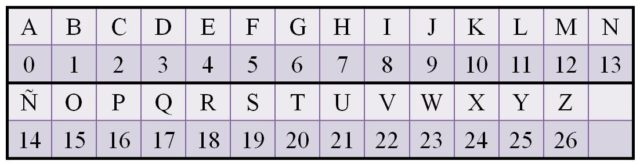

In [2]:
mensaje = "ATAQUEINMINENTE"  # El texto plano que ciframos
clave    = "CLAVE"  # Palabra clave que define el orden de la permutación

In [3]:
mensaje = "holaquetal"
clave    = "FACIL"

In [4]:
mensaje = "UNIVERSIDAD CENTRAL DEL ECUADOR"
clave    = "FACIL"

Números de la clave

In [5]:
mostrar_clave_vertical(clave)


Representación Vertical de la Clave:
Letra | Índice
----------------
  F   |  5
  A   |  0
  C   |  2
  I   |  8
  L   |  11



# Cifrado

Llamada al cifrado

In [6]:
print("Mensaje original:", mensaje)
cifrado = cifrar(mensaje, clave)  # Llamada al cifrado
print("Cifrado:", cifrado)

Mensaje original: UNIVERSIDAD CENTRAL DEL ECUADOR

Matriz original:
U | N | I | V | E
R | S | I | D | A
D |   | C | E | N
T | R | A | L |  
D | E | L |   | E
C | U | A | D | O
R |   |   |   |  

Orden de columnas: [2, 0, 1, 3, 4]
Cifrado: NS REU IICALA URDTDCRVDEL D EAN EO 


# Descifrado

Desciframos para comprobar

In [7]:
print("Mensaje cifrado:", cifrado)
print("Clave:", clave)
descifrado = descifrar(cifrado, clave)  # Desciframos para comprobar
print("Descifrado:", descifrado)

Mensaje cifrado: NS REU IICALA URDTDCRVDEL D EAN EO 
Clave: FACIL
Orden de columnas: [2, 0, 1, 3, 4]
Clave ordenada según clave_num: ['A', 'C', 'F', 'I', 'L']

Matriz con mensaje cifrado colocada por columnas:
N | I | U | V | E
S | I | R | D | A
  | C | D | E | N
R | A | T | L |  
E | L | D |   | E
U | A | C | D | O
  |   | R |   |  


Matriz reconstruida:
U | N | I | V | E
R | S | I | D | A
D |   | C | E | N
T | R | A | L |  
D | E | L |   | E
C | U | A | D | O
R |   |   |   |  

Descifrado: UNIVERSIDAD CENTRAL DEL ECUADOR
